***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('data/dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [0, 1576, 3940, 11820, 19700, 200000]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
labels = list('ABCDE')
labels

['A', 'B', 'C', 'D', 'E']

### 3º Construir a coluna de frequências

In [6]:
frequencia = pd.value_counts(pd.cut(dados.Renda, bins = classes, labels = labels, include_lowest=True))

### 4º Construir a coluna de percentuais

In [7]:
percentual = pd.value_counts(pd.cut(dados.Renda, bins = classes, labels = labels, include_lowest=True), normalize=True)

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
tmp = {'Frequencia' : frequencia, 'Percentual' : percentual}
dist_freq_renda = pd.DataFrame(tmp).sort_index()
dist_freq_renda

,Frequencia,Percentual
A,49755,0.647514
B,18602,0.242087
C,7241,0.094235
D,822,0.010698
E,420,0.005466


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:ylabel='Frequencia'>

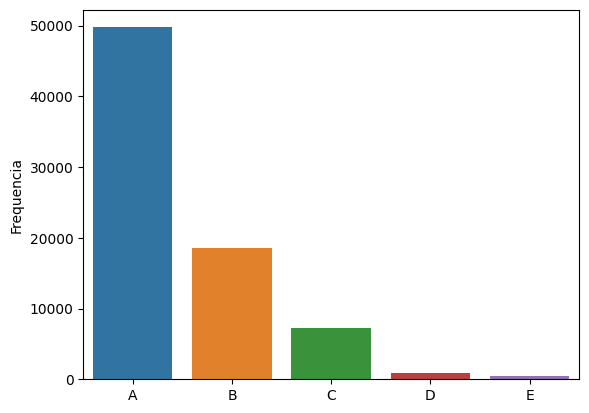

In [9]:
sns.barplot(data = dist_freq_renda, x = dist_freq_renda.index, y = dist_freq_renda.Frequencia)

> ### Conclusões

A maior parte da população, ganha até 2 salários mínimos, enquanto uma pequena parte, ganha até 25, sendo vísivel, a diferença no gráfico, com a classe A, sendo a maior de todas

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<AxesSubplot:>

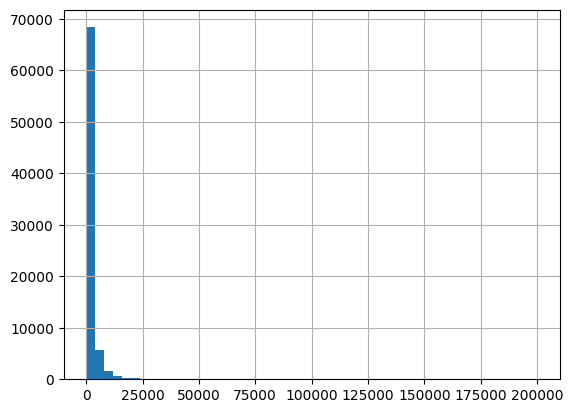

In [10]:
dados.Renda.hist(bins = 50)

<AxesSubplot:>

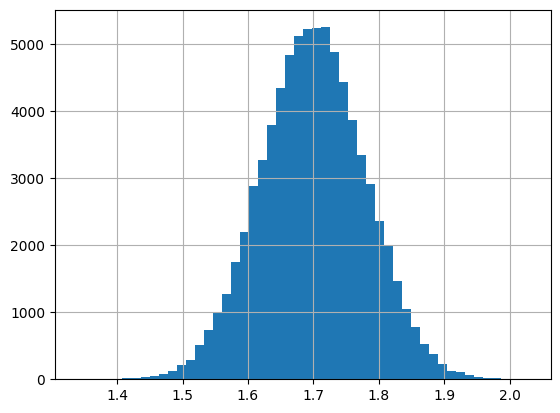

In [11]:
dados.Altura.hist(bins = 50)

<AxesSubplot:>

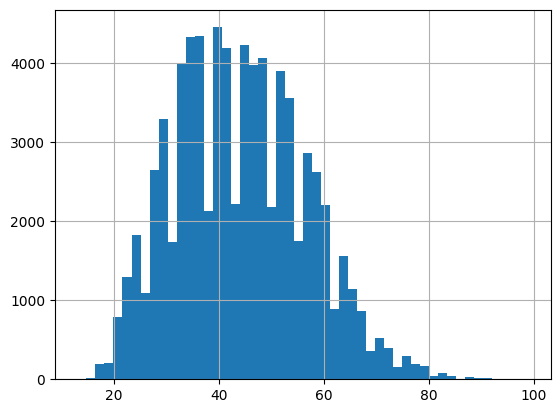

In [12]:
dados['Idade'].hist(bins = 50)

> ### Conclusões

A variável renda, possui uma assimetria a esquerda, fazendo possível mostrar que grande parte da população ganha menos, e que a distribuição de renda é assimetríca, disferente da altura que é quase perfeitamente simétrica

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<AxesSubplot:>

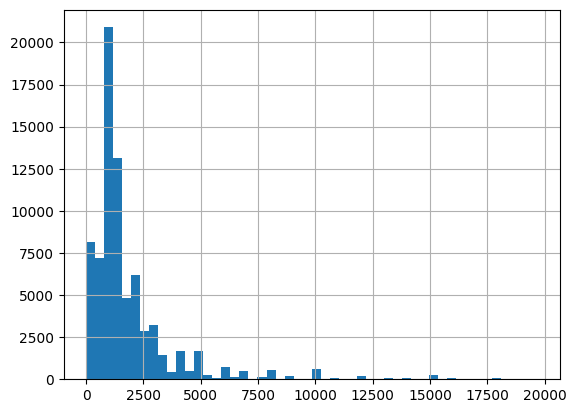

In [13]:
dados.query('Renda < 20000').Renda.hist(bins = 50)

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [28]:
dados.Sexo = dados.Sexo.replace(sexo)
dados.Cor = dados.Cor.replace(cor)
dados['Anos de Estudo'] = dados['Anos de Estudo'].replace(anos_de_estudo)
dados.UF = dados.UF.replace(uf)
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631


In [32]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize=True)

In [33]:
frequencia

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [34]:
percentual

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.001523,0.125208,0.001314,0.141359,0.037598
Masculino,0.003058,0.288834,0.003332,0.326171,0.071603


> ### Conclusões

A maioria dos homens são pardos, e as mulheres também

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [35]:
media_renda = dados.Renda.mean()
media_renda

2000.3831988547631

### Obtenha a mediana

In [36]:
mediana_renda = dados.Renda.median()
mediana_renda

1200.0

### Obtenha a moda

In [37]:
moda_renda = dados.Renda.mode()[0]
moda_renda

788

### Obtenha o desvio médio absoluto

In [38]:
desvio_medio_absoluto = dados.Renda.mad()
desvio_medio_absoluto

1526.4951371638058

### Obtenha a variância

In [39]:
variancia = dados.Renda.var()
variancia

11044906.006217021

### Obtenha o desvio-padrão

In [40]:
desvio_padrao = dados.Renda.std()
desvio_padrao

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [45]:
pd.crosstab(dados.Sexo, dados.Cor, aggfunc='median', values = dados.Renda)

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,1500.0,1200.0,788.0,800.0,800.0
Masculino,2800.0,1700.0,797.5,1200.0,1200.0


> ### Conclusões

Tanto pra masculino como feminino, pessoas com a cor amarela ganham mais

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [46]:
pd.crosstab(dados.Sexo, dados.Cor, aggfunc='std', values = dados.Renda)

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,3731.17366,3251.013154,11957.498292,1596.233048,1349.799809
Masculino,5740.82482,4750.791872,1204.093490,2312.087184,1936.309271


> ### Conclusões

Desvio padrão da cor preta é menor para ambos os sexos

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

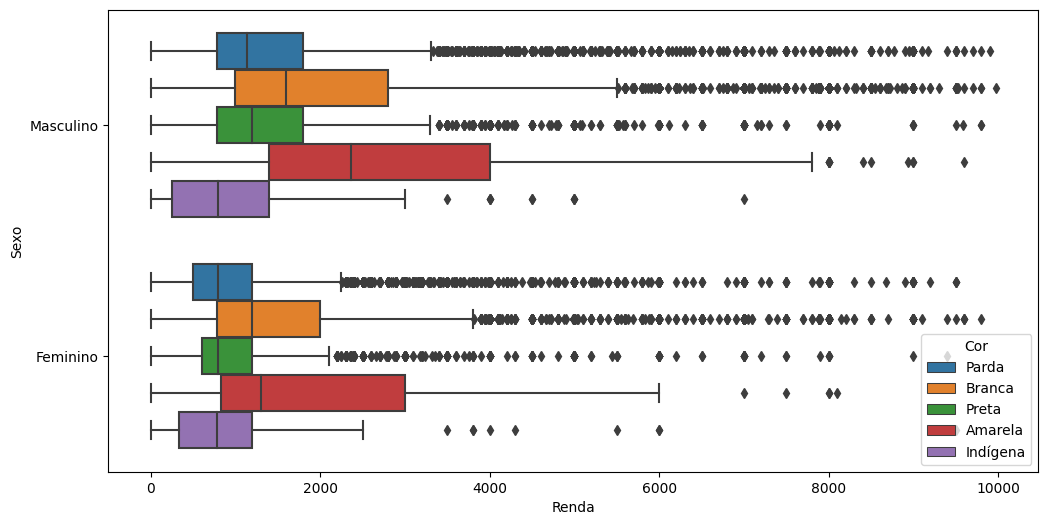

In [54]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), hue = 'Cor')
ax.figure.set_size_inches(12, 6)

> ### Conclusões

Pessoas indigenas ganham menos

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

# 25%

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [59]:
dados.Renda.quantile(q = [i / 100 for i in range(1, 101, 1)]).loc[0.99]

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [63]:
pd.crosstab(dados['Anos de Estudo'], dados['Sexo'], aggfunc='std', values = dados.Renda)

Sexo,Feminino,Masculino
Anos de Estudo,,
1 ano,425.291842,1331.950552
10 anos,620.611907,2078.609734
11 anos,1819.040417,2676.538942
12 anos,4851.833513,2268.081538
13 anos,2053.789771,2797.116800
14 anos,2064.083336,3987.214974
15 anos ou mais,4212.770709,7447.613594
2 anos,498.234168,1435.173827
3 anos,424.124446,2143.800133


### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

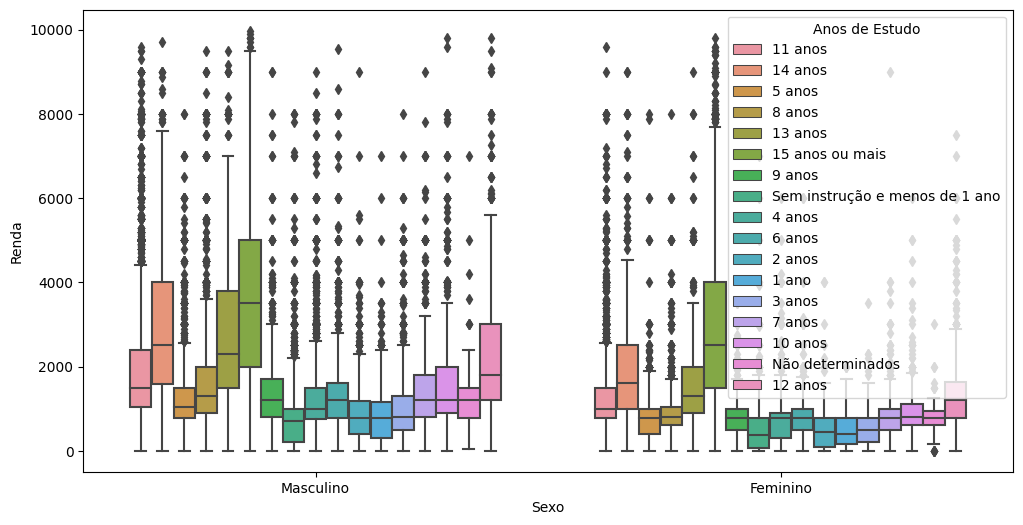

In [70]:
ax = sns.boxplot(x = 'Sexo', y = 'Renda', data = dados.query('Renda < 10000'), hue = 'Anos de Estudo')
ax.figure.set_size_inches(12, 6)

> ### Conclusões

Mulheres ganham menos, mesmo com anos de estudo superior aos dos homens

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [72]:
pd.crosstab(dados.UF, dados.Sexo, aggfunc = 'mean', values = dados.Renda)

Sexo,Feminino,Masculino
UF,,
Acre,1128.615063,1635.342407
Alagoas,1105.473684,1157.752593
Amapá,1736.164835,1930.396970
Amazonas,1235.832849,1539.989460
Bahia,1175.015175,1557.495271
Ceará,1085.795053,1341.616974
Distrito Federal,3269.883895,4863.366321
Espírito Santo,1752.707022,2129.324226
Goiás,1339.376392,2222.632558


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

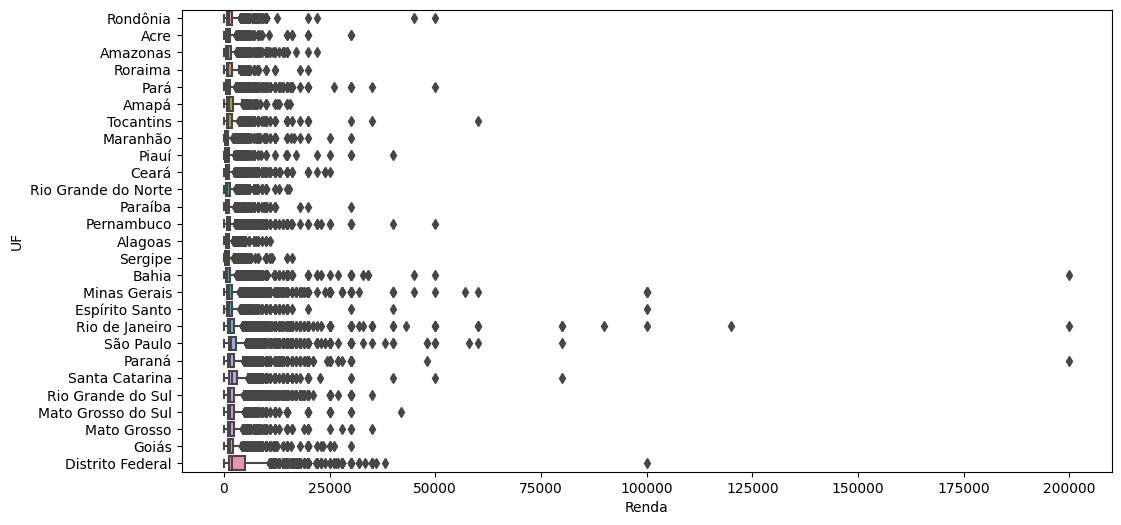

In [75]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados)
ax.figure.set_size_inches(12, 6)

> ### Conclusões

Escreva suas conclusões aqui...